In [1]:
from astropy.table import Table
from IPython.display import display
from pathlib import Path
from matplotlib import pyplot

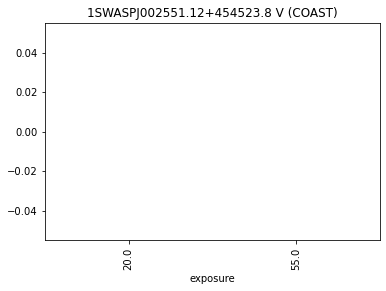

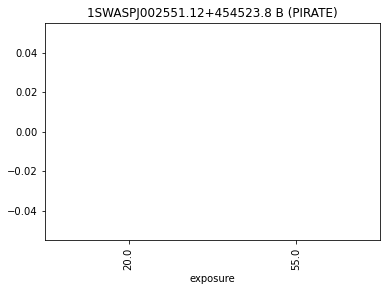

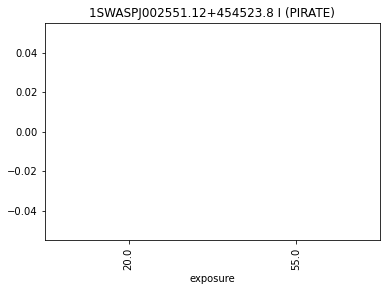

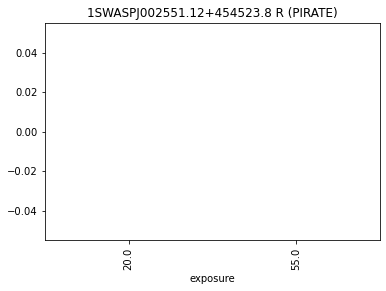

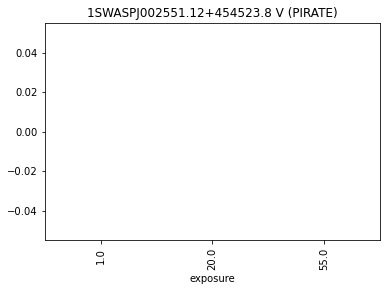

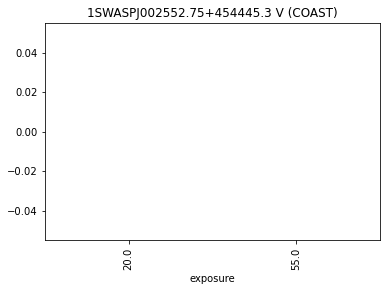

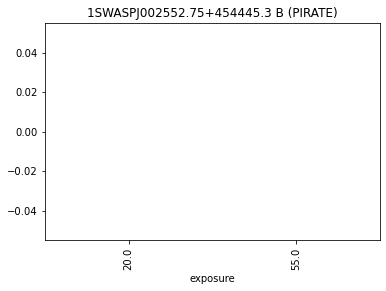

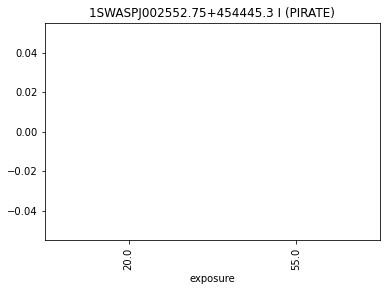

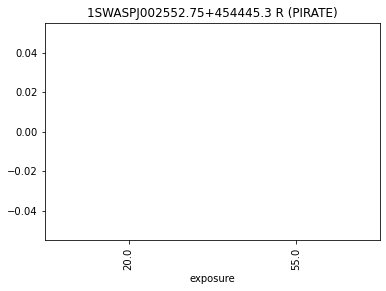

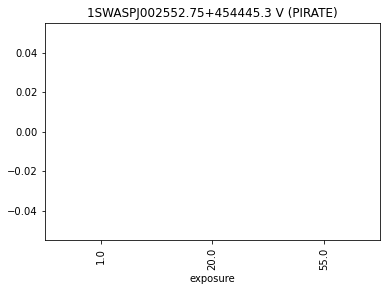

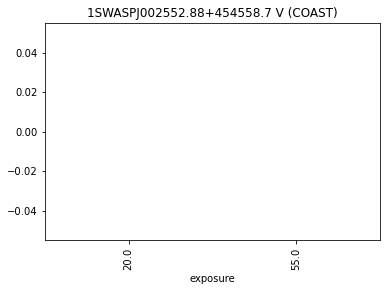

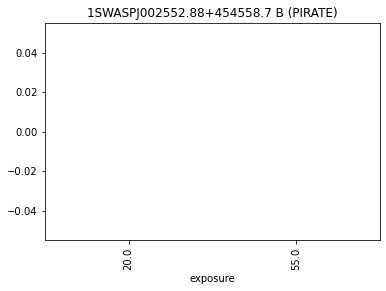

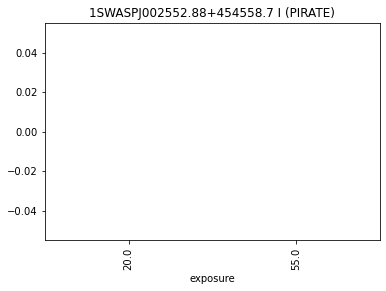

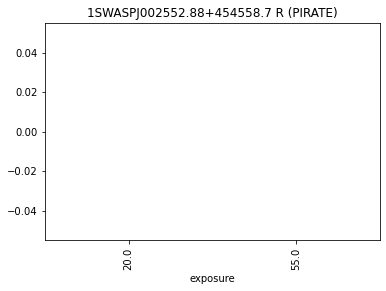

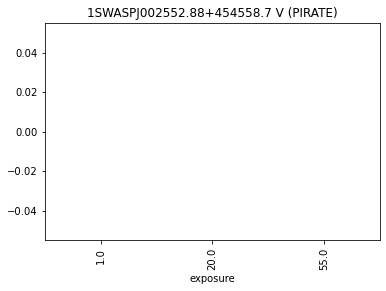

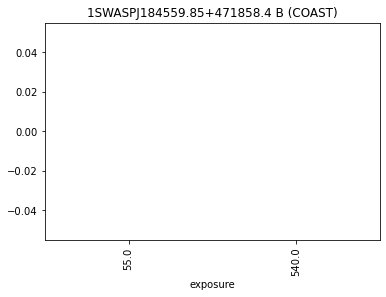

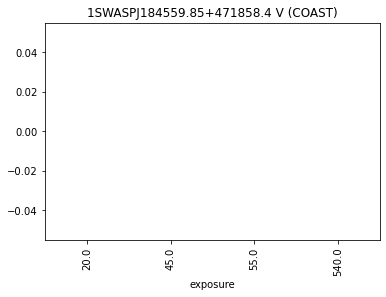

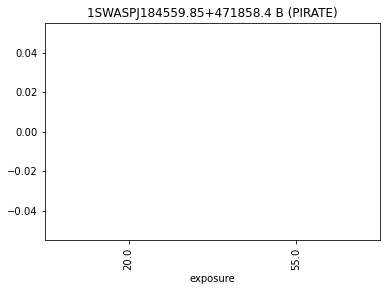

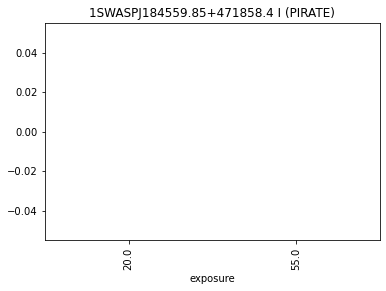

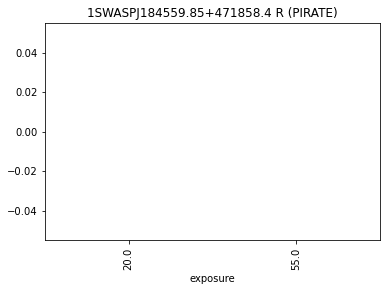

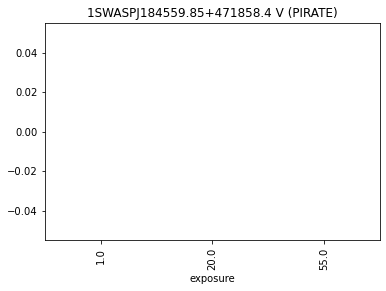

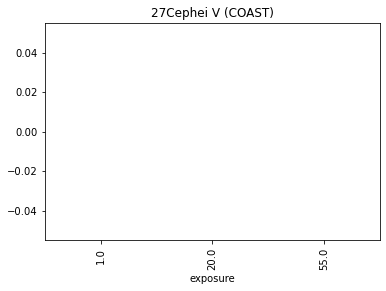

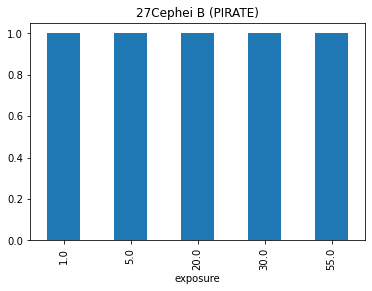

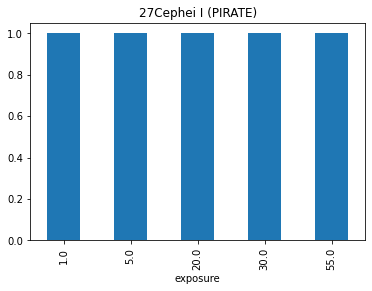

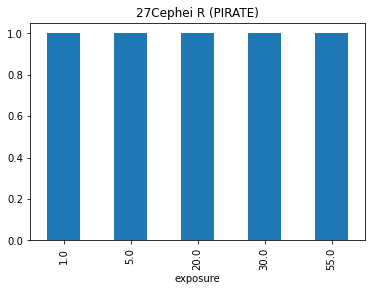

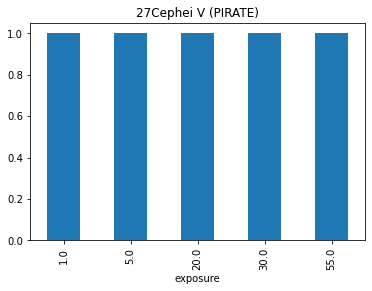

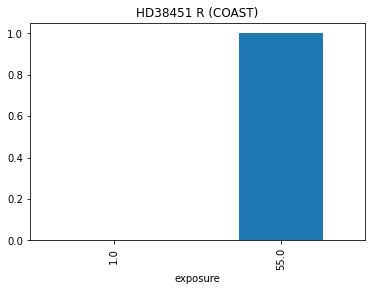

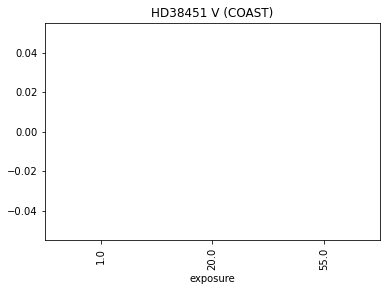

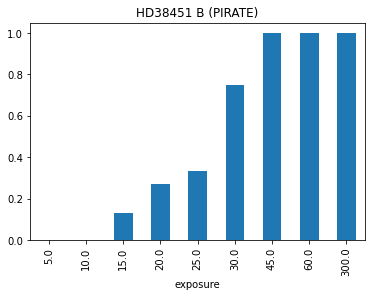

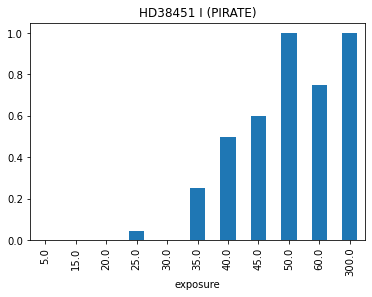

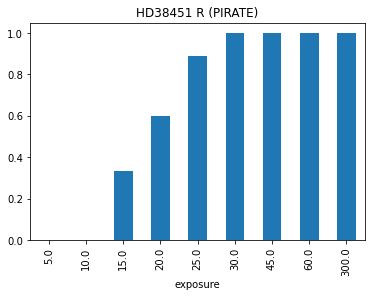

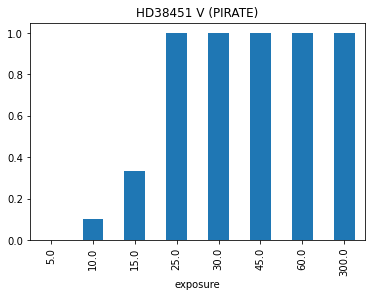

In [2]:
for table in Path('data').glob('*.ecsv'):
    photometry = Table.read(table)
    photometry['flagged'] = (photometry['FLAGS'] & 4) != 0
    for telescope, telescope_group in photometry.to_pandas().groupby('telescope'):
        for band, group in telescope_group.groupby('band'):
            pt = group[['exposure', 'flagged']].pivot_table(
                columns='flagged',
                index=['exposure'],
                aggfunc=lambda x: len(x),
                fill_value=0,
            )
            if True not in pt:
                pt[True] = 0
            if False not in pt:
                pt[False] = 0
            pt['frac'] = pt[True] / (pt[True] + pt[False])
            pt['frac'].plot.bar()
            pyplot.title(f'{table.stem} {band} ({telescope})')
            pyplot.show()